In [1]:
# Neural network 

from __future__ import print_function

# IMPORT MNIST data

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np





Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
# Parameters


learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network parameters

n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784
num_classes = 10


In [4]:
# Define the input for training

input_fn = tf.estimator.inputs.numpy_input_fn(
    x =  {'images': mnist.train.images}, y = mnist.train.labels, 
    batch_size = batch_size, num_epochs = None, shuffle = True)


In [5]:
# Define the neural network

def neural_net(x_dict):
    
    
    x = x_dict['images']
    
    layer_1 =  tf.layers.dense(x, n_hidden_1)
    
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    
    out_layer = tf.layers.dense(layer_2, num_classes)
    
    return out_layer


In [6]:
# Define the model function

def model_fn(features, labels, mode):
    
    
    logits = neural_net(features)
    
    # Predictions 
    pred_classes = tf.argmax(logits, axis = 1)
    pred_probas  = tf.nn.softmax(logits)
    
    # Jezeli prediction mode, wczesniej zwroc wynik 
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions = pred_classes)
    
    
    # Zdefiniowanie loss i parameters
    
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits = logits, labels = tf.cast(labels, dtype = tf.int32)))
    optimizer =  tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train_op = optimizer.minimize(loss_op, global_step = tf.train.get_global_step())
    
    
    # Obliczenie celnosci modelu
    
    acc_op = tf.metrics.accuracy(labels = labels, predictions = pred_classes)
    
    # TF Estimators wymaga EstimatorSpec, that specify 
    # roznica ops for training , evaluating
    
    
    estim_specs = tf.estimator.EstimatorSpec(
    mode = mode, 
    predictions = pred_classes, 
    loss = loss_op, 
    train_op = train_op, 
    eval_metric_ops = {'accuracy': acc_op})
    
    return estim_specs

In [7]:
# Budowanie estymatora

model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {}


In [8]:
model.train(input_fn, steps = num_steps)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Damiano\AppData\Local\Temp\tmp26xrhgzb\model.ckpt.
INFO:tensorflow:loss = 2.32879, step = 1
INFO:tensorflow:global_step/sec: 208.329
INFO:tensorflow:loss = 0.382426, step = 101 (0.481 sec)
INFO:tensorflow:global_step/sec: 214.115
INFO:tensorflow:loss = 0.284116, step = 201 (0.467 sec)
INFO:tensorflow:global_step/sec: 213.198
INFO:tensorflow:loss = 0.265223, step = 301 (0.470 sec)
INFO:tensorflow:global_step/sec: 215.029
INFO:tensorflow:loss = 0.385491, step = 401 (0.465 sec)
INFO:tensorflow:global_step/sec: 213.651
INFO:tensorflow:loss = 0.356158, step = 501 (0.467 sec)
INFO:tensorflow:global_step/sec: 214.109
INFO:tensorflow:loss = 0.345334, step = 601 (0.467 sec)
INFO:tensorflow:global_step/sec: 213.648
INFO:tensorflow:loss = 0.278111, step = 701 (0.468 sec)
INFO:tensorflow:global_step/sec: 215.035
INFO:tensorflow:loss = 0.411024, step = 801 (0.466 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Restoring parameters from C:\Users\Damiano\AppData\Local\Temp\tmp26xrhgzb\model.ckpt-1000


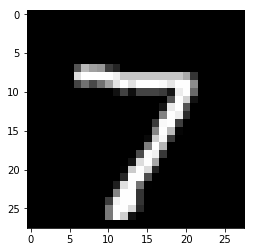

Model predictions 7


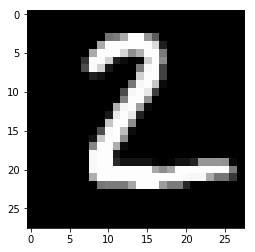

Model predictions 2


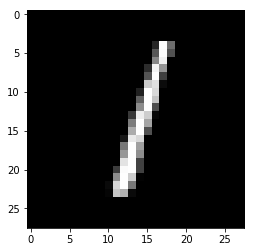

Model predictions 1


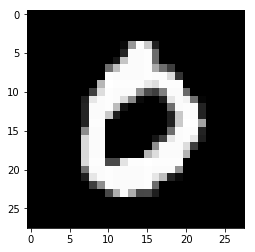

Model predictions 0


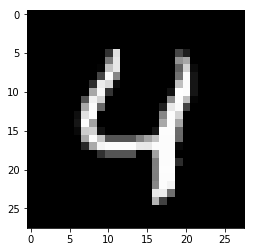

Model predictions 4


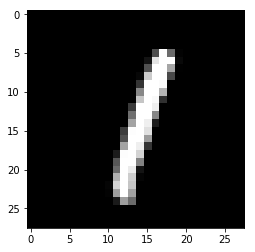

Model predictions 1


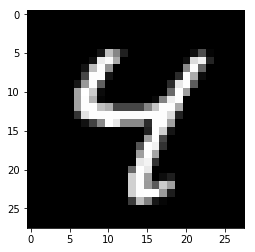

Model predictions 4


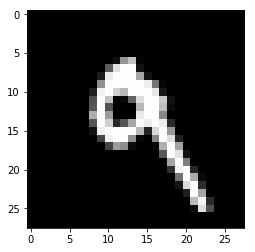

Model predictions 9


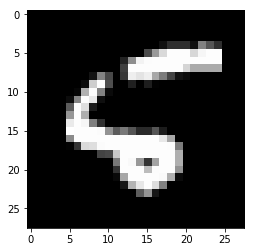

Model predictions 6


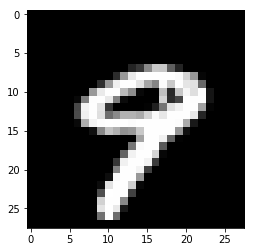

Model predictions 9


In [11]:
# Predict single images

n_images = 10
# Get images from test set


test_images =  mnist.test.images[:n_images]

# Przygotowanie input data

input_fn = tf.estimator.inputs.numpy_input_fn(
x= {'images':test_images}, shuffle = False)

preds = list(model.predict(input_fn))

# Wyswietlenie rezultatow

for i in range(n_images):
    
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap = 'gray')
    plt.show()
    print("Model predictions", preds[i])

